#  ¿Cómo se mueve un péndulo? 

> Fecha del proyecto: Lunes 29 de Abril.

> Calificaciones: https://drive.google.com/file/d/19rcQyjtzkfcHItyROkIsgT3OXOh-fIUS/view

> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="http://images.iop.org/objects/ccr/cern/51/3/17/CCast2_03_11.jpg" width="400px" height="100px" />
 </div>

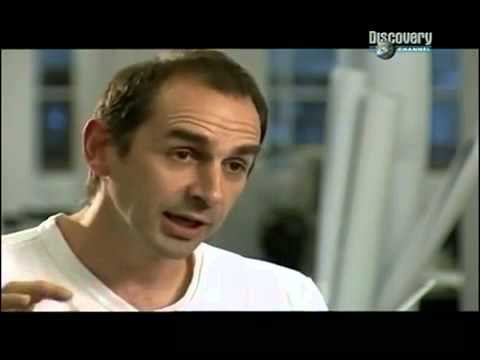

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? **Ley de Hooke!**
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [2]:
#Importar librerías necesarias
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Estas instrucciones cambian el tamaño de letra de los ejes de las gráficas
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

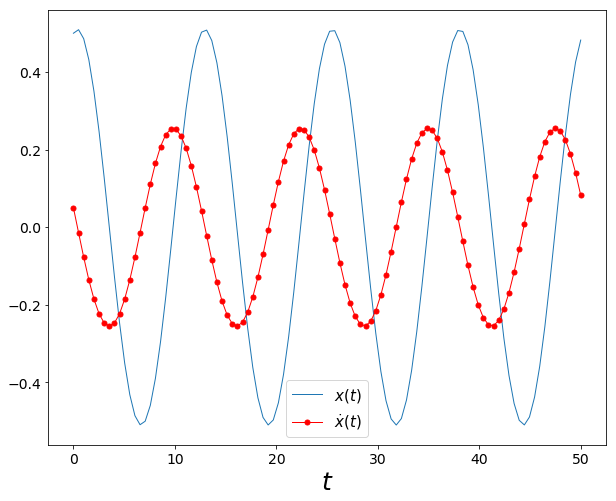

In [4]:
# Definición de funciones a graficar
A, B, w0 = 0.5, 0.1, 0.5
t = np.linspace(0,50,100)
x = A*np.cos(w0*t) + B*np.sin(w0*t)
dx = w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

# Gráfico
plt.figure(figsize=(10,8))
plt.plot(t,x,'-',lw = 1, ms=1, label='$x(t)$')
plt.plot(t,dx,'ro-',lw=1,ms=5, label='$\dot{x}(t)$')
plt.legend(loc='best',fontsize=15)
plt.xlabel('$t$',fontsize=25)
plt.show()

Y si consideramos un conjunto de frecuencias de oscilación, entonces 

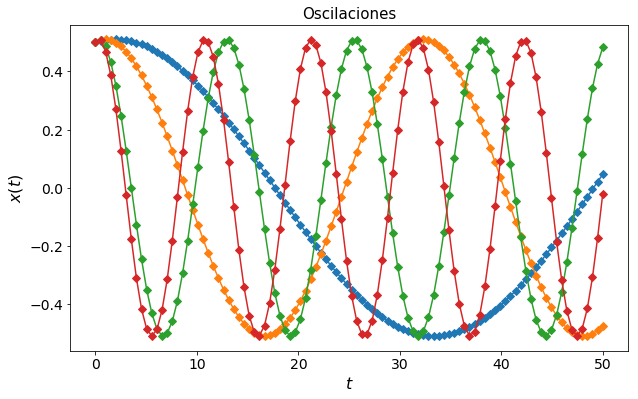

In [5]:
frecuencias = np.array([0.1,0.2,0.5,0.6])
plt.figure(figsize=(10,6))

# Graficamos para cada frecuencia
for w0 in frecuencias:
    x = A*np.cos(w0*t) + B*np.sin(w0*t)
    plt.plot(t,x,'D-')

plt.xlabel('$t$',fontsize=16)
plt.ylabel('$x(t)$',fontsize=16)
plt.title('Oscilaciones',fontsize=15)
plt.show()

Estos colores, son el default de `matplotlib`, sin embargo existe otra librería dedicada, entre otras cosas, a la presentación de gráficos.

In [19]:
import seaborn as sns
sns.set(style = 'ticks', palette = 'dark')

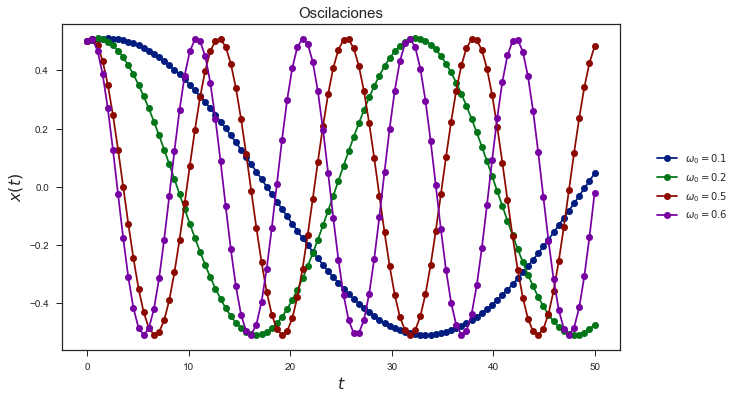

In [20]:
frecuencias = np.array([0.1,0.2,0.5,0.6])
plt.figure(figsize=(10,6))

# Graficamos para cada frecuencia
for w0 in frecuencias:
    x = A*np.cos(w0*t) + B*np.sin(w0*t)
    plt.plot(t,x,'o-', label= '$\omega_0 = %s$'%w0)

plt.xlabel('$t$',fontsize=16)
plt.ylabel('$x(t)$',fontsize=16)
plt.title('Oscilaciones',fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.05,0.5),prop={'size':10})
plt.show()


Si queremos tener manipular un poco mas las cosas, hacemos uso de lo siguiente:

In [22]:
from ipywidgets import *

In [23]:
def masa_resorte(t = 0):
    A, B, w0 = .5, .1, .5                            # Parámetros
    x = A*np.cos(w0*t)+B*np.sin(w0*t)                # Función de posición
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, [0],  'ko', ms = 10)
    ax.set_xlim(left = -0.6, right = .6)
    ax.axvline(x=0, color = 'r')
    ax.axhline(y=0, color = 'grey', lw = 1)
    fig.canvas.draw()

interact(masa_resorte, t = (0, 50,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=50.0, step=0.01), Output()), _dom_classes=('…

La opción de arriba generalmente será lenta, así que lo recomendable es usar `interact_manual`. 

In [24]:
def masa_resorte(t = 0):
    A, B, w0 = .5, .1, .5                            # Parámetros
    x = A*np.cos(w0*t)+B*np.sin(w0*t)                # Función de posición
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, [0],  'ko', ms = 10)
    ax.set_xlim(left = -0.6, right = .6)
    ax.axvline(x=0, color = 'r')
    ax.axhline(y=0, color = 'grey', lw = 1)
    fig.canvas.draw()
    
interact_manual(masa_resorte, t = (0, 50,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=50.0, step=0.01), Button(description='Run In…

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple _(oscilaciones pequeñas)_, la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = l \cos(\theta) 
\end{align}

In [25]:
# Podemos definir una función que nos entregue theta dados los parámetros y el tiempo
def theta_t(a,b,g,l,t):
    w_0 = np.sqrt(g/l)
    return a*np.cos(w_0*t) + b*np.sin(w_0*t)

In [26]:
# Hacemos un gráfico interactivo del péndulo
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    a, b, g, l = .4, .6, 9.8, 2
    x = l * np.sin(theta_t(a, b, g, l, t))
    y =  - l * np.cos(theta_t(a, b, g, l, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(left = -2.2, right = 2.2)
    ax.set_ylim(bottom = -2.2, top = .2)
    fig.canvas.draw()
    
interact_manual(pendulo_simple, t = (0, 10,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

### Condiciones iniciales 

Realmente lo que se tiene que resolver es, 

\begin{equation}
\theta(t) = \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)
\end{equation}

> **Actividad.** Modificar el programa anterior para incorporar las condiciones iniciales. 

In [27]:
# Solución: 
def theta_t(theta0,dtheta0,g,l,t):
    w_0 = np.sqrt(g/l)
    a = theta0
    b = dtheta0/w_0
    return a*np.cos(w_0*t) + b*np.sin(w_0*t)

In [28]:
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    theta0, dtheta0 = np.pi/4, 0,
    g, l = 9.8, 2
    x = l * np.sin(theta_t(theta0, dtheta0, g, l, t))
    y =  - l * np.cos(theta_t(theta0, dtheta0, g, l, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(left = -2.2, right = 2.2)
    ax.set_ylim(bottom = -2.2, top = .2)
    fig.canvas.draw()
    
interact_manual(pendulo_simple, t = (0, 10,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

### Plano fase  $(x, \frac{dx}{dt})$

La posición y velocidad para el sistema `masa-resorte` se escriben como: 

\begin{align}
x(t) &= x(0) \cos(\omega_{o} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{o} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

In [29]:
#Definir parámetros y condiciones iniciales
k = 3
m = 1
w_0 = np.sqrt(k/m)
x_0 = 0.5
dx_0 = 0.1

t = np.linspace(0,15,300)

In [30]:
#Definir solución del sistema
x_t = x_0*np.cos(w_0*t) + (dx_0/w_0)*np.sin(w_0*t)
dx_t = -w_0*x_0*np.sin(w_0*t) + dx_0*np.cos(w_0*t)

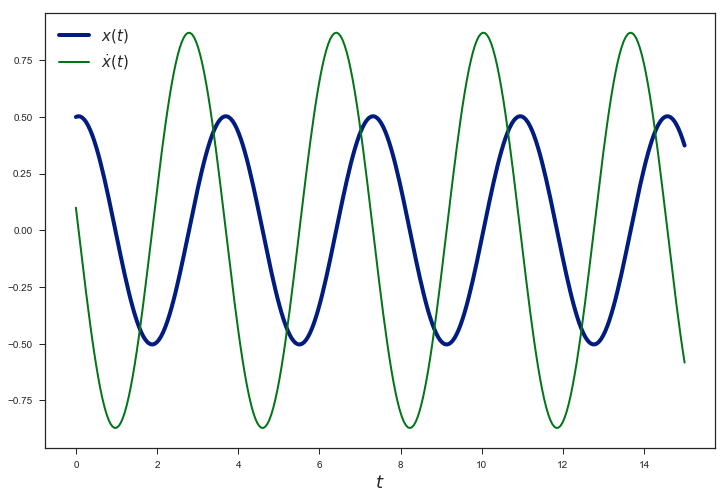

In [31]:
#Graficar
plt.figure(figsize=(12,8))
plt.plot(t,x_t,label='$x(t)$',lw=4)
plt.plot(t,dx_t,label='$\dot{x}(t)$',lw = 2)
plt.legend(loc = 'best',fontsize=15)
plt.xlabel('$t$',fontsize=18)
plt.show()

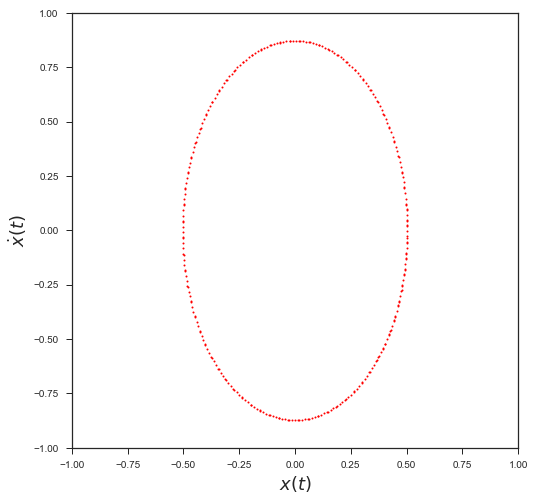

In [33]:
#Graficar plano fase
plt.figure(figsize=(8,8))
plt.plot(x_t,dx_t,'ro',ms =2)
plt.xlabel('$x(t)$',fontsize=18)
plt.ylabel('$\dot{x}(t)$',fontsize=18)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

### Multiples condiciones iniciales

In [ ]:
#Definir parámetros


In [ ]:
#Condiciones iniciales


In [ ]:
#Graficar


Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$ para diferentes valores de la energía. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>